In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


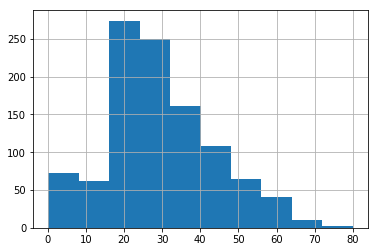

In [4]:
%matplotlib inline
df['age'].hist()

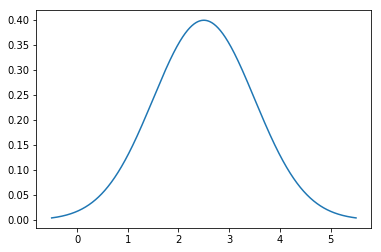

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.linspace(-0.5, 5.5, 1000)
y = norm.pdf(x, loc=2.5)
plt.plot(x, y)
plt.show()

In [10]:
import numpy as np
x = np.array([6, 12, 9, 17, 16, 12])
y = np.array([1, 4, 3, 9, 3, 4])
x, y

(array([ 6, 12,  9, 17, 16, 12]), array([1, 4, 3, 9, 3, 4]))

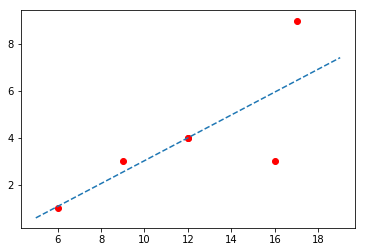

In [11]:

x1 = x - x.mean()
y1 = y - y.mean()
b = sum(x1 * y1)/sum(x1**2)
a = y.mean() - b * x.mean()

test_x = np.arange(5, 20)
test_y = a + b * test_x
test_y
plt.scatter(x, y,  color='red')
plt.plot(test_x, test_y, "--")
plt.show()

In [13]:
y_s_krishkoy = a + b * x
e = y  - y_s_krishkoy
e

array([-0.06976744,  0.        ,  0.46511628,  2.55813953, -2.95348837,  0.        ])

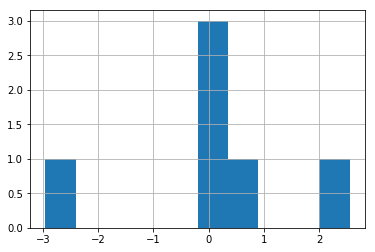

In [16]:
pd.Series(e).hist()

In [ ]:
# V(e) = sum(e_i**2)/(n - 2)
# V(b) = V(e) / sum((x_i - x.mean())**2)
# V(a) = V(b) * sum(x_i**2)/n
# t_b = b / sqrt(V(b))
# t_a = a / sqrt(V(a))

In [18]:
V_e = sum(e**2) / (len(x) - 2)
V_b = V_e / sum(x1**2)
V_a = V_b * sum(x**2)/len(x)
t_b = b / V_b ** 0.5
t_a = a / V_a ** 0.5
t_b, t_a

(2.3015858222750016, -0.69680569009494742)

In [21]:
'y = {:.03f} + {:.03f} * x'.format(a, b)

'y = -1.860 + 0.488 * x'

In [2]:
import numpy as np
from sklearn import datasets
import statsmodels.api as sm

diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           3.83e-62
Time:                        19:49:13   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0